# COGS 108 - Final Project 

# Overview

Parks and recreation centers are known for conducting activities that promote a healthy lifestyle to the community. In this project, I plan to look at datasets of each park acre and see if there is a correlation between yelp reviews. The purpose is to advise Parks and Rec if there is a need to keep building bigger parks. I unfortunately could not come up with a conclusion because I had a difficult time combining my data.

# Name & GitHub

- Name: Christine Larios
- GitHub Username: chr1stin3

# Research Question

Is there a relationship between San Diego's park size and yelp reviews?

## Background and Prior Work

The Department of Parks and Recreation maintains at least 278 state park units which include parks, recreation areas, campgrounds, nature reserves, and culture reserves (1).  It is important for these park units to be appealing to the public especially when nearly 70 million people visit these places (1). The State Parks Commission is responsible for classifying park units and approving general plans for the use and development of each park, and size plays a large factor in this decision making (1).
San Diego’s parks and recreation centers consist of more than 340 parks and covers around 40,000 acres of open space (2). Their mission is “to provide healthy, sustainable, and enriching environments for all” (3). 
 With an estimated 2 million visitors from outside San Diego and 2.6 million local residents, it is important for the San Diego Department of Parks and Recreation to complete their mission and know what factors attract more visitors and better reviews (4). One of the most well-known platforms used to write and read reviews is Yelp. Yelp consists of over 70 million users and has around 178 million visits made yearly (5). In a study conducted by Robert E. Manning and Wayne A. Freimund, they used visual research to measure the quality of parks and outdoor recreation centers. This study suggested that people who see more equipment and have bigger space in a park and recreation center tend to be more in favor for those areas compare to ones that only have a park. (6) This study connects to my research question because it is comparing space of a park with people's preference. However, mine is more centered with reviews and acre space to see the impact it has on people's reviews.


References (include links):
Links
-1) http://www.allgov.com/usa/ca/departments/natural-resources-agency/department_of_parks_and_recreation?agencyid=160

-2) https://www.sandiego.gov/park-and-recreation/parks

-3) https://www.sandiego.gov/parks-and-recreation

-4) http://balboaparkconservancy.org/wp-content/uploads/2017/09/Balboa-Park-Benefits-Study-2017.pdf

-5)https://review42.com/yelpstatistics/#:~:text=4.-,Yelp%20has%20more%20than%20178%20million,monthly%20across%20mobile%20and%20desktop.&text=77%20million%20unique%20users%20per,and%2062%20million%20%E2%80%93%20via%20desktop. 

-6) https://www.tandfonline.com/doi/abs/10.1080/00222216.2004.11950036


# Hypothesis


I hypothesize that parks with more acres of land will have better and higher reviews. The reason for this is because bigger parks tend to be less crowded than smaller ones. Also, there is more room for more playground equipment and activities which makes the park more enjoyable for visitors and their children. In contrast, smaller parks are more likely to be overcrowded and limited with activities which is why they are more likely to get worse reviews than parks with more acres. 


# Dataset(s)

- Dataset Name:parks_datasd.geojson
- Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 2769 rows and 8 columns

This dataset provided the park's name and number of acres. This was the starting point of combining data reviews with number of acres.


- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: no link
- Number of observations: 833 rows and 10 columns

This dataset showed the total of reviews and the overall ratings for parks. I was able to see which parks I was going to use and sort the highest to lowest rating. 


- Dataset Name: yelp_SD_reviews.csv
- Link to the dataset: no link
- Number of observations: 833 rows and 10 columns

This dataset showed the total of reviews and the overall ratings for parks. I plan to use word analysis and find a pattern in the reviews.



I plan to combine all 3 datasets to provide park's name, number of acres, overall rating, and key word reviews.

# Setup

In [2]:
#Importing Packages
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import patsy
import statsmodels.api as sm

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

In [3]:
#Importing Data
df = gpd.read_file("/home/chlarios/individual_fa20/data/parks_datasd.geojson")
df_parks = pd.read_csv("/home/chlarios/individual_fa20/data/parks_dictionary_datasd.csv")
df_park_info = pd.read_csv("/home/chlarios/individual_fa20/data/yelp_SD_parks.csv")
df_yelp_revs = pd.read_csv("/home/chlarios/individual_fa20/data/yelp_SD_reviews.csv")

# Data Cleaning

Checking column's names in order to see what information I should keep.

In [4]:
#Checking Headers
df.head()

,objectid,name,alias,gis_acres,park_type,location,owner,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,,State Parks,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,,State Parks,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,"POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,"POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,"MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."


My data contains 2769 rows and 8 columns. I will first clean the data by eliminating rows that do not end with park. Then I will focus only focus on local parks in order to be more specifil with data. I will be removing columns: objectid, alias, location, owner and geometry. Then I will organize this data by largest acres to lowest

In [5]:
#Removing Unncessary Info
df = df.drop(columns=['objectid','alias','location','owner', 'geometry'], axis=1)
df = df[df['name'].str.endswith('Park', na=False)]
df

,name,gis_acres,park_type
2,Ruocco Park,3.312526,Local
3,Tuna Harbor Park,0.639035,Local
4,San Diego Bayfront Park,3.669272,Local
5,Pepper Park,4.820515,Local
22,Grand Caribe Shoreline Park,2.298034,Local
...,...,...,...
2759,Calavo Park,9.172766,Local
2764,San Luis Rey River Park,712.262117,Open Space
2765,Horse Creek Ridge Sports Park,8.398529,Local
2767,Harmony Grove Community Park,3.575260,Local


In [19]:
#Fixing Index number and Filtering by Highest Rating to Lowest Rating
df = df.sort_values(by=['gis_acres'], ascending = False)
df = df.reset_index()
df = df.drop(columns=['index'], axis=1)
df

,name,gis_acres,park_type
0,Otay Valley Regional Park,4527.461761,Regional
1,Lake Morena Park,3183.948987,Regional
2,Tijuana River Valley Park,1778.826476,Regional
3,Mission Trails Regional Park,1521.400744,Regional
4,William Heise Park,1016.224334,Regional
...,...,...,...
261,Bayview Park,0.203976,Local
262,Pocket Park,0.197902,Local
263,Leucadia Roadside Park,0.171303,Local
264,Lancerlot Park,0.155534,Local


In [6]:
#Checking Headers
df_park_info.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [7]:
#Checking for Duplicates and Names
df_park_info.duplicated().sum()
df_park_info['name']

0                                Balboa Park
1                                Civita Park
2                            Waterfront Park
3                          Trolley Barn Park
4                              Bay View Park
                       ...                  
828                    Del Cerro - San Diego
829    San Diego Metropolitan Transit System
830                               Petco Park
831       Ann D. L'Heureux Memorial Dog Park
832                           Fairbrook Farm
Name: name, Length: 833, dtype: object

In my park's info dataset, it shows I have a total of 833 locations. I am going to clean my data by only keeping names that contain park. It will be a better way to narrow down my info, but I do have a risk of removing some parks that might not include the word park in their names. Because this dataset is pretained to San Diego county, I am going to remove the adddress column. I'm also going to remove the columns phone, id, and url because it is irrevelant for my data analysis. 

In [8]:
#Removing Unncessary Info
df_park_info = df_park_info.drop(columns=['address','phone','id','url'], axis=1)
df_park_info = df_park_info[df_park_info['name'].str.endswith('Park', na=False)]

In [9]:
df_park_info

,name,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,5.0,2105,-117.153150,32.734502,False
1,Civita Park,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,4.5,102,-117.143789,32.762463,False
4,Bay View Park,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...
820,Spreckels Park,4.5,24,-117.176320,32.690827,False
821,Pioneer Park,3.5,16,-117.115723,33.029802,False
822,Capehart Dog Park,3.0,85,-117.225335,32.807007,False
830,Petco Park,4.0,1667,-117.157054,32.707246,False


In [10]:
#Fixing Index number and Filtering by Highest Rating to Lowest Rating
df_park_info = df_park_info.sort_values(by=['rating'], ascending = False)
df_park_info = df_park_info.reset_index()
df_park_info = df_park_info.drop(columns=['index'], axis=1)
df_park_info

,name,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,5.0,2105,-117.153150,32.734502,False
1,Pacific Rim Park,5.0,1,-117.233560,32.708364,False
2,Giant Paintball Airsoft Park,5.0,4,-116.835528,32.989116,False
3,Scripps Ranch Villages Butterfly Park,5.0,1,-117.083623,32.933009,False
4,Dog Park At Rohr Park,5.0,12,-117.038036,32.664019,False
...,...,...,...,...,...,...
235,Nestor Neighborhood Park,2.0,1,-117.081224,32.571103,False
236,Dorothy Petway Neighborhood Park,1.5,3,-117.118942,32.692970,False
237,Lamar Park,1.5,12,-117.005774,32.739836,False
238,Vista Terrace Neighborhood Park,1.0,1,-117.051049,32.565884,False


In [11]:
checking = df_park_info['is_closed'] == True
checking

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Name: is_closed, Length: 240, dtype: bool

In [12]:
df_yelp_revs.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


In [13]:
#Dropping Reviews of ID locations that do not contain Park at the end
df_yelp_revs = df_yelp_revs[df_yelp_revs['id'].str.endswith('Park', na=False)]
df_yelp_revs = df_yelp_revs.sort_values(by=['rating'], ascending = False)
df_yelp_revs = df_yelp_revs.reset_index()
df_yelp_revs = df_yelp_revs.drop(columns=['index'], axis=1)
df_yelp_revs

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Mt Helix Park,5,"Best place to see the city, exercise & chill, ..."
2,Del Mar Trails Park,5,We used to call this Orange Park - but several...
3,Fiesta Island Off Leash Dog Park,5,Great spot for relaxation on the beach! I brin...
4,Fiesta Island Off Leash Dog Park,5,Bring your dogs here!! This is a great walk ar...
...,...,...,...
670,Lamar Park,1,This park had huge potential until the very la...
671,Lamar Park,1,"I have lived in spring Valley for 4 years, the..."
672,Lamar Park,1,Homeless have taken over the park. Sleeping in...
673,Sunnyslope Park,1,Park is in terrible condition. Both of the pl...


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

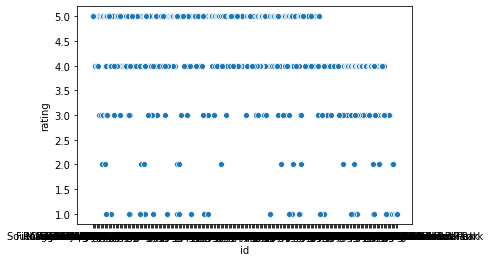

In [15]:
#Graph park's name and rating
z = df_yelp_revs.groupby(df_yelp_revs['id'])
sns.scatterplot(x= df_yelp_revs['id'], y = df_yelp_revs['rating'])

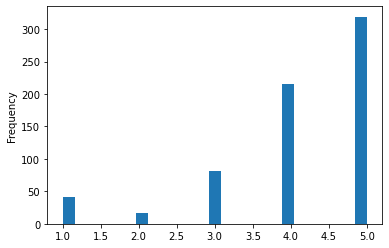

In [17]:
#checking just rating
df_yelp_revs['rating'].plot(kind = 'hist', bins =25)

I notice there is a higher frequency of 5 ratings so I want to focus on the ones with low rating to understand why they had such a low rating.

# Ethics & Privacy

All this information was provided publicy. In order to protect people's identity from their yelp reviews, their location was not shared. However, in the case of ethics, park reviews could have been submitted by tourist which means it skews the information from local residents to tourists. I wanted to focus on helping local parks and by getting yelp reviews,it brings the possibility on focusing on tourist. 

# Conclusion & Discussion

Unfortunately, I was not able to come up with a conclusion and finish my analysis because I had a limitation of time. I found it difficult to combine information with key words on the review. I did not think about how there would be a number of reviews for the same park. I tried combining those reviews with the park but I could not accomplish it. 

It was difficult for me to find the right way to combine the information. If I had more time, I would have continue trying to clean my data to make it simple and understandable. I needed to first remove all regional parks and keep it to local parks. Then, with cleaning the dataset df, I would have moved to my yelp review dataset and clean out all the parks that are not found in my df dataset. This would had allowed me to combine the data and see the reviews and number of acres. After this was combined, it was time to language process and find key words like "small", "crowded", "space", "big", "equipment", "range", and "acre". This would have narrow down my information in order to see the correlation of reviews and size. 

Another thing I conclude is to comment off code that does not work instead of deleting them. I couldn't go back to the previous work because once I got an error, I would delete it. I realize that commenting off code that does not work would have allowed me to see the errors I was making and try to improve from them.